In [1]:
import numpy as np
from xgboost import XGBClassifier
from utilities import *
from sklearn.manifold import TSNE

In [2]:
X_train, X_test, y_train, y_test = prepare_data()

In [ ]:
bdt_clf = XGBClassifier(random_state=42)
bdt_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = bdt_clf.predict(X_test)

In [ ]:
evaluate_sklearn_model(y_test, y_pred)

Accuracy: 0.9428
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     28279
         1.0       0.92      0.94      0.93     17903

    accuracy                           0.94     46182
   macro avg       0.94      0.94      0.94     46182
weighted avg       0.94      0.94      0.94     46182

Confusion Matrix:
 [[26772  1507]
 [ 1134 16769]]
Mean Squared Error:
 0.05718678272920185


In [6]:
X_test_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test) 

In [7]:
X_test_embedded_3D = TSNE(n_components=3, random_state=42).fit_transform(X_test)

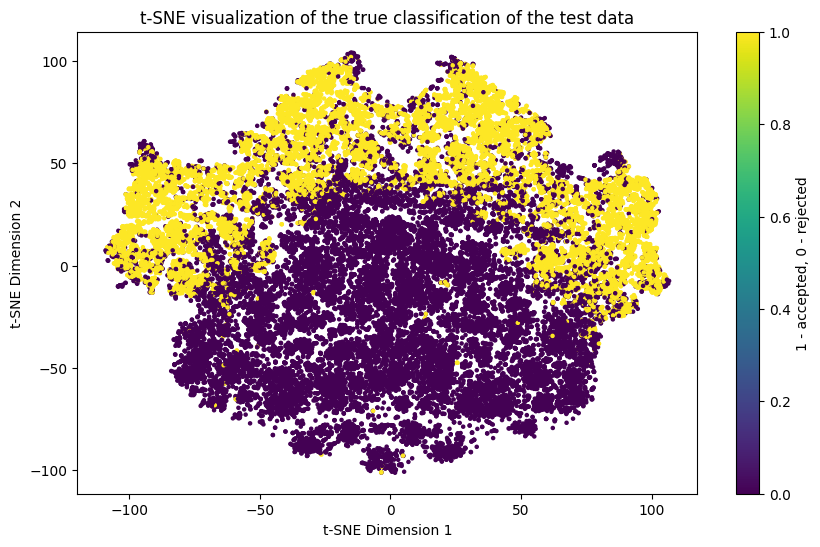

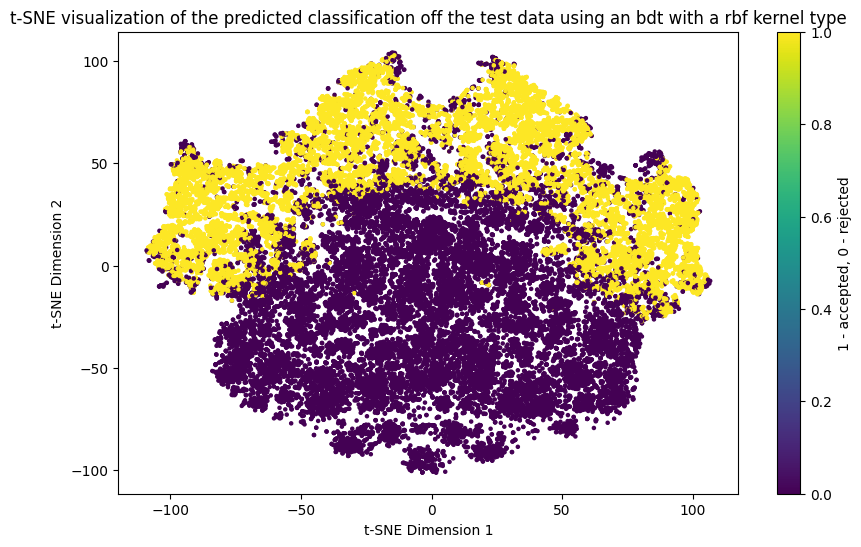

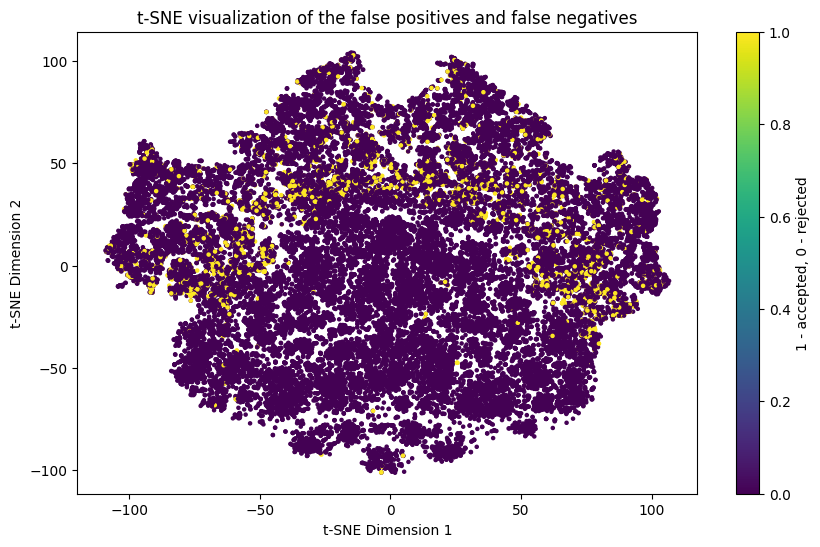

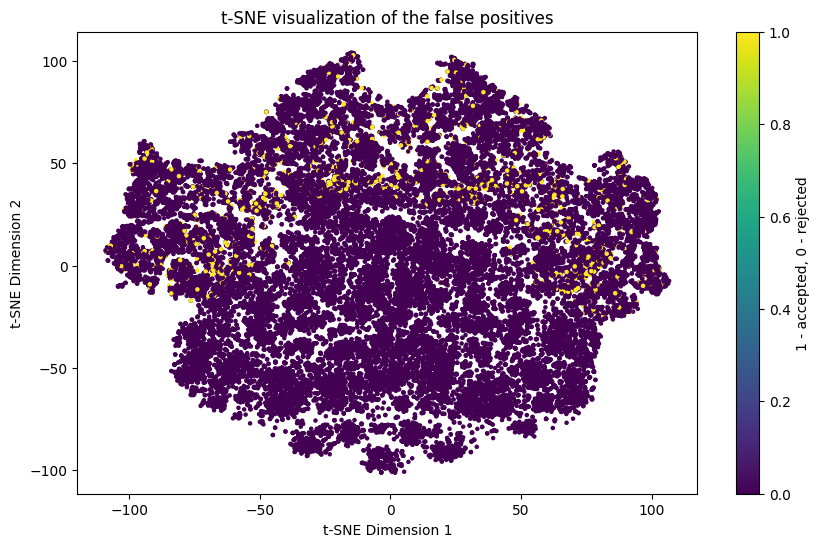

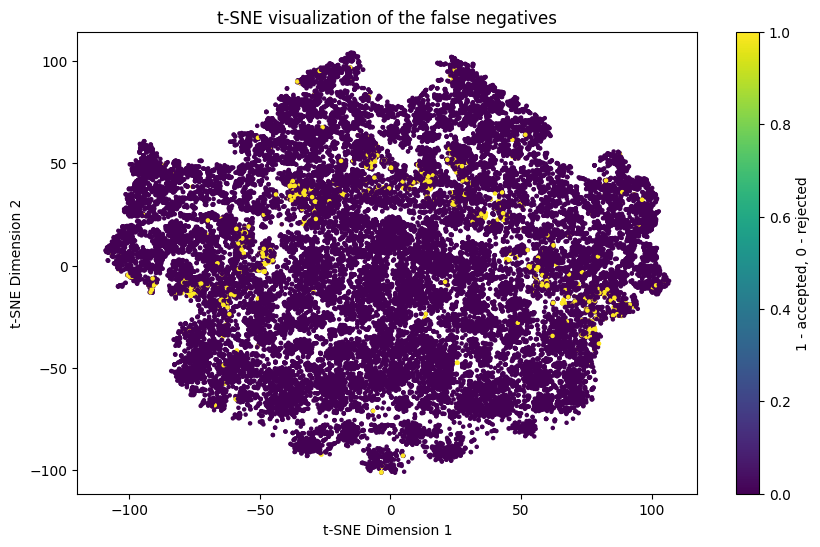

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [8]:
y_fpfn = np.logical_xor(y_test, y_pred)
y_fn = np.logical_and(y_test,np.logical_not(y_pred))
y_fp = np.logical_and(np.logical_not(y_test),y_pred)

plot_2D_TSNE(X_test_embedded,y_test,"t-SNE visualization of the true classification of the test data")
plot_2D_TSNE(X_test_embedded,y_pred,"t-SNE visualization of the predicted classification off the test data using an bdt with a rbf kernel type")
plot_2D_TSNE(X_test_embedded,y_fpfn,"t-SNE visualization of the false positives and false negatives")
plot_2D_TSNE(X_test_embedded,y_fp,"t-SNE visualization of the false positives")
plot_2D_TSNE(X_test_embedded,y_fn,"t-SNE visualization of the false negatives")

plot_3D_TSNE(X_test_embedded_3D, y_test)
plot_3D_TSNE(X_test_embedded_3D, y_pred)
plot_3D_TSNE(X_test_embedded_3D, y_fpfn)
plot_3D_TSNE(X_test_embedded_3D, y_fp)
plot_3D_TSNE(X_test_embedded_3D, y_fn)